In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
# Heart problemsbased only on the “sex”, “fbs”, “restecg”, “exang” and “Age_quantile”
# ["sex", "fbs", "restecg", "exang", "Age_quantile"] 
df = pd.read_csv('./data/UCI_heart.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [age, sex, trestbps, chol, fbs, restecg, thalach, exang, Heart_problem, Age_Quantile]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            303 non-null    int64 
 1   sex            303 non-null    int64 
 2   trestbps       303 non-null    int64 
 3   chol           303 non-null    int64 
 4   fbs            303 non-null    int64 
 5   restecg        303 non-null    int64 
 6   thalach        303 non-null    int64 
 7   exang          303 non-null    int64 
 8   Heart_problem  303 non-null    int64 
 9   Age_Quantile   303 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.8+ KB


In [4]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            303 non-null    int64
 1   sex            303 non-null    int64
 2   trestbps       303 non-null    int64
 3   chol           303 non-null    int64
 4   fbs            303 non-null    int64
 5   restecg        303 non-null    int64
 6   thalach        303 non-null    int64
 7   exang          303 non-null    int64
 8   Heart_problem  303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age_Quantile  303 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


Heart_problem
0    164
1    139
Name: count, dtype: int64
Heart_problem
0    54.125413
1    45.874587
Name: count, dtype: float64


,Age_Quantile
0,Q4
1,Q4
2,Q4
3,Q1
4,Q1


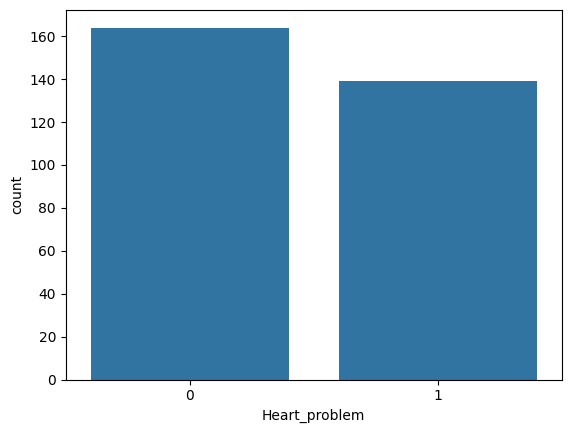

In [5]:
df_num = pd.get_dummies(df_num, drop_first=True)
df_obj = pd.get_dummies(df_obj, drop_first=True)
# Target is numerical

print(df_num['Heart_problem'].value_counts())
print( (df_num['Heart_problem'].value_counts()/ df_num['Heart_problem'].value_counts().sum()) * 100)
sns.countplot(data=df_num, x='Heart_problem')
df_obj.head()

In [6]:
df
attr = df[["sex", "fbs", "restecg", "exang", "Age_Quantile"]]
target = df["Heart_problem"]

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.25, random_state=7)

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,max_leaf_nodes=5)

In [15]:

attr_train


# model.fit(attr_train,target_train)
# target_pred = model.predict(attr_test)

,sex,fbs,restecg,exang,Age_Quantile
24,1,0,2,1,Q3
246,1,0,0,0,Q3
62,1,0,2,1,Q3
235,1,0,2,1,Q2
78,1,0,2,0,Q1
...,...,...,...,...,...
211,1,0,0,1,Q1
67,1,0,2,0,Q2
25,0,0,0,0,Q2
196,1,1,2,0,Q4


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);

In [ ]:
# pip install c45-decision-tree

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from C45 import C45Classifier

In [ ]:
# Initialize the classifier (replace with C45Classifier if available)
# clf = DecisionTreeClassifier(criterion='entropy')  # C4.5 uses information gain (entropy)
clf=C45Classifier()
# Train the classifier
clf.fit(attr_train,target_train)
target_pred2 = clf.predict(attr_test)
print(f"\n Accuracy: {accuracy_score(target_test,target_pred2)}  ")

print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred2))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred2))
